<a href="https://colab.research.google.com/github/tjdux/ML/blob/main/20_visualization_of_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 가중치 시각화
- 절편: 일반적으로 시각적으로 의미가 있지 않음
- 가중치: 어떤 특징을 크게 두드러지게 표현하는 역할

### 훈련된 모델의 가중치 시각화

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/best-cnn-model.h5')

In [3]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [4]:
# 첫 번째 합성곱 층의 가중치, 절편의 크기
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [5]:
# 첫 번째 합성곱 층의 가중치 배열의 평균, 표준편차
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.01553981 0.22507702


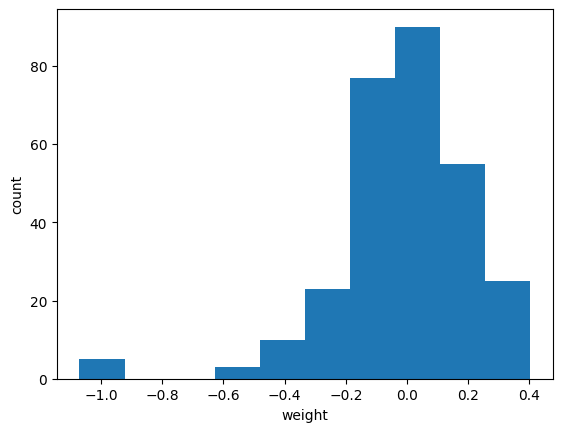

In [6]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

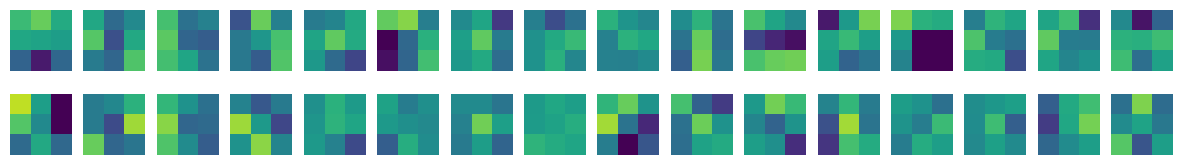

In [7]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))

for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis("off")

plt.show()

- 밝은 부분이 높은 값
- `vmin`, `vmax` 매개변수: 맷플롯립의 컬러맵으로 표현해야 할 범위 지정

### 훈련되지 않은 모델의 가중치 시각화

In [8]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28, 28, 1)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [10]:
no_training_weights = no_training_model.layers[0].weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std()) # 매우 작은 표준편차

0.0027860657 0.083499655


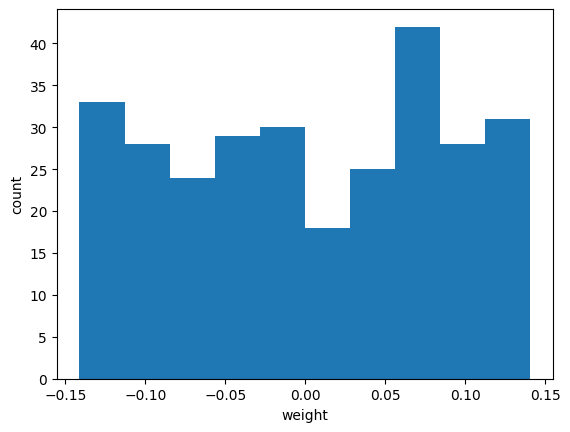

In [11]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

- 👉 텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택

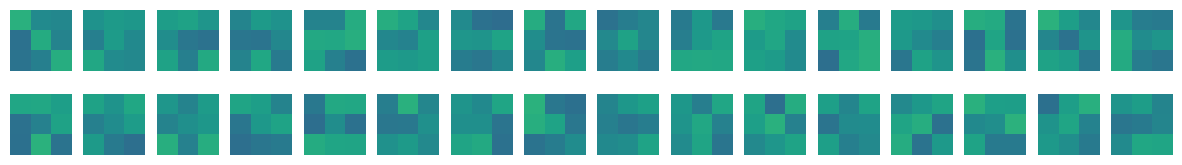

In [12]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))

for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis("off")

plt.show()

- 👉 가중치가 밋밋하게 초기화됨

## 함수형 API
- 좀 더 복잡한 모델을 만들 때 사용
- `Model` 클래스를 사용
```python
dense1 = keras.layers.Dense(100, activation="sigmoid")
dense2 = keras.layers.Dense(10, activation="softmax")

inputs = keras.Input(shape=(784,))
hidden = dense1(inputs)
outputs = dense2(hidden)
model = keras.Model(inputs, outputs)
```
![img](https://velog.velcdn.com/images/dltpdl31/post/8ecf935c-9ddb-4372-a137-5fa100f276c1/image.png)


In [13]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer>]


In [15]:
# 첫 번째 Conv2D의 출력을 반환
conv_acti = keras.Model(model.inputs, model.layers[0].output)

![img](https://velog.velcdn.com/images/dltpdl31/post/72b3ae27-5ba4-45d5-a767-08fca92bcddd/image.png)

## 특성 맵 시각화

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


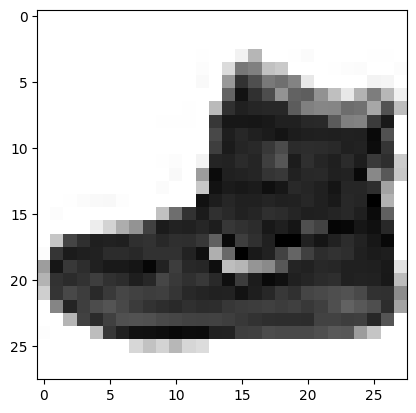

In [16]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap="gray_r")
plt.show()

### 첫 번째 합성곱 층의 특성 맵 시각화

In [17]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [18]:
print(feature_maps.shape) # 세임 패딩, 32개의 필터 사용

(1, 28, 28, 32)


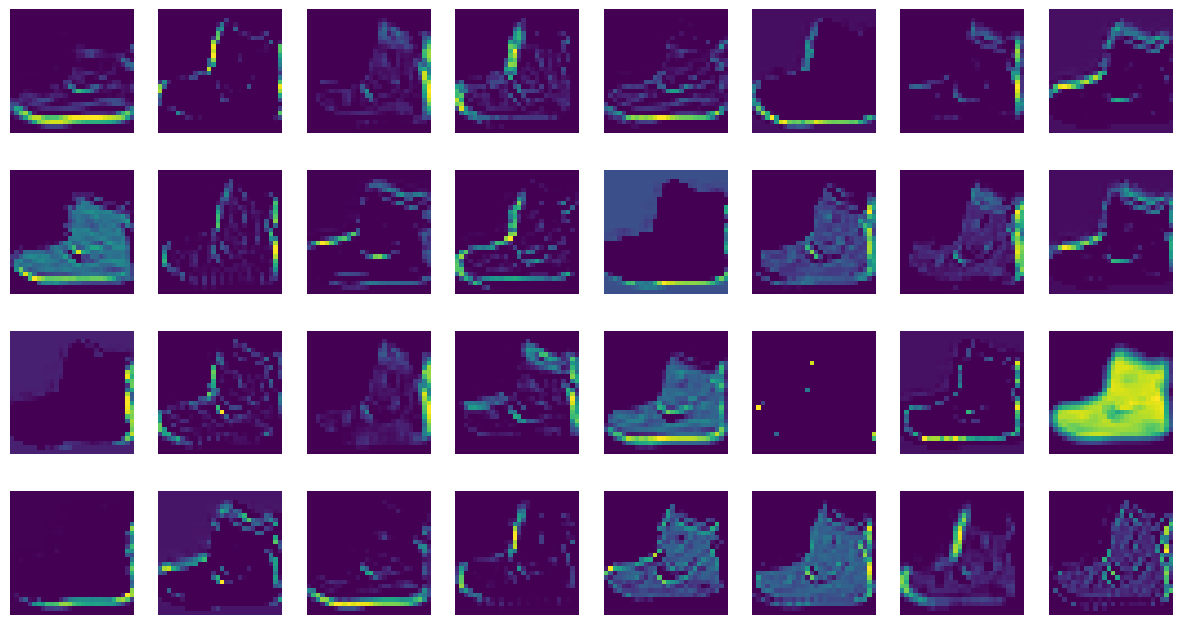

In [19]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))

for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis("off")

plt.show()

### 두 번째 합성곱 층의 특성 맵 시각화

In [21]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [22]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


In [23]:
print(feature_maps.shape)

(1, 14, 14, 64)


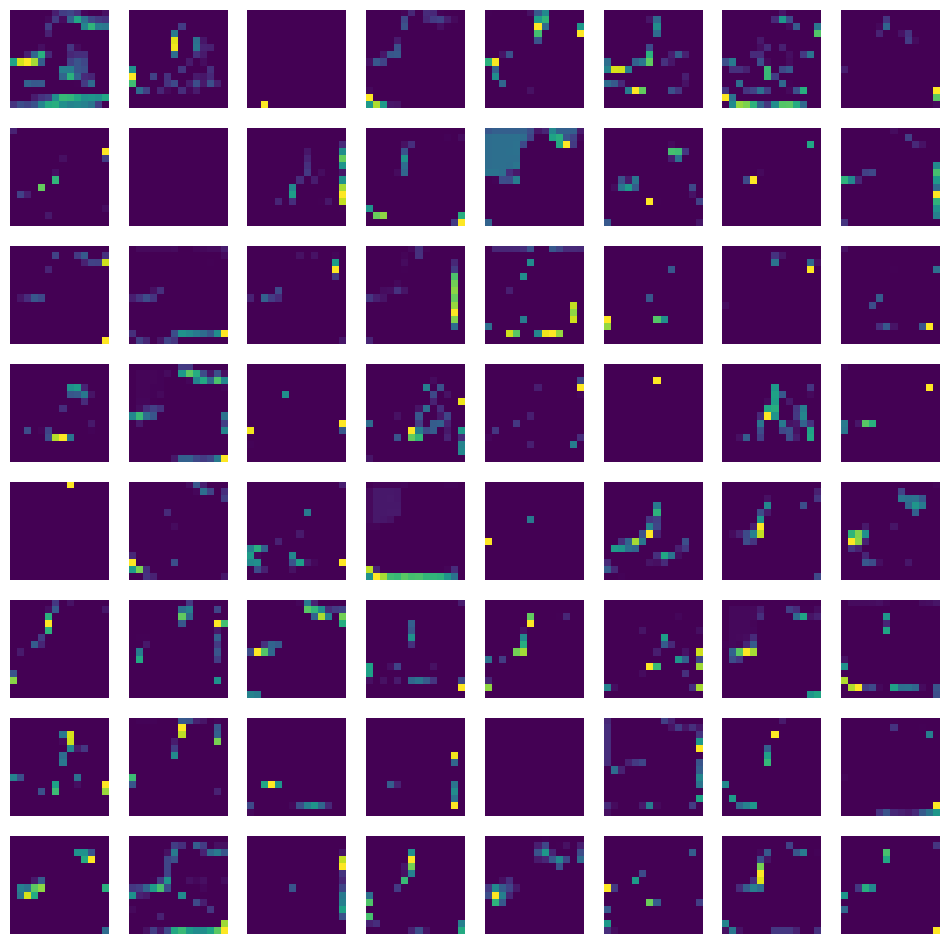

In [24]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))

for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis("off")

plt.show()

- CNN의 앞부분에 있는 합성곱 층: 이미지의 시각적 정보 감지
- CNN의 뒷부분에 있는 합성곱 층: 앞 쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습